In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, classification_report, f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import shap

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
# load the dataset
data = pd.read_csv("/content/imbalanced_data.csv")
print(data.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [ ]:
data.shape

(58592, 41)

In [ ]:
data.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


In [ ]:
data.isnull().sum()

,0
policy_id,0
subscription_length,0
vehicle_age,0
customer_age,0
region_code,0
region_density,0
segment,0
model,0
fuel_type,0
max_torque,0


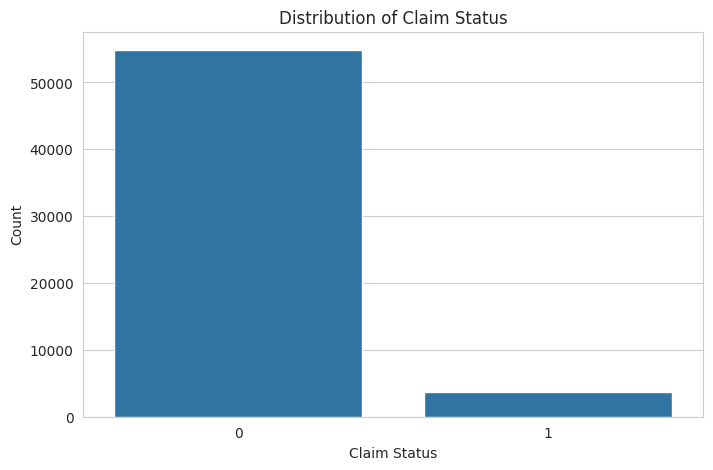

In [ ]:
sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=data)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

<ipython-input-12-56e2c5639aa1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='claim_status', data=data, palette=palette, saturation=0.8)
<ipython-input-12-56e2c5639aa1>:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x='claim_status', data=data, palette=palette, saturation=0.8)


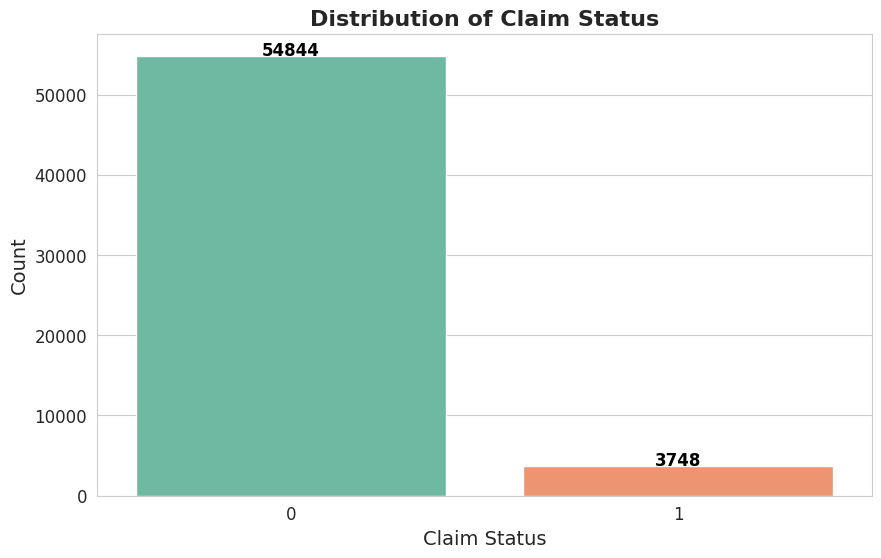

In [ ]:
# Set a custom style
sns.set_style("whitegrid")

palette = sns.color_palette("Set2")
# Plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(10, 6))
sns.countplot(x='claim_status', data=data, palette=palette, saturation=0.8)
plt.title('Distribution of Claim Status', fontsize=16, fontweight='bold')
plt.xlabel('Claim Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', fontweight='bold')

# Show the plot
plt.show()


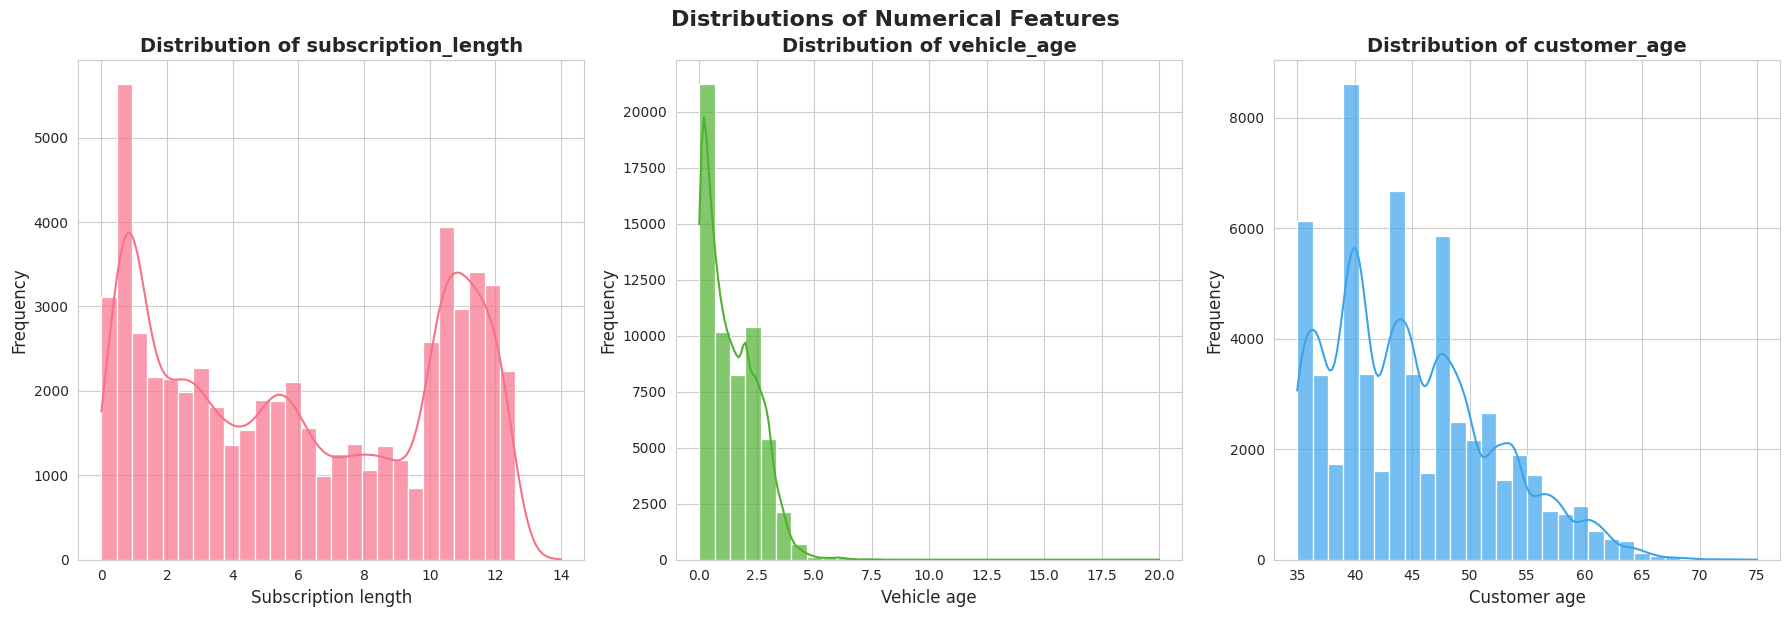

In [ ]:
# Selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# Custom color palette
palette = sns.color_palette("husl", len(numerical_columns))

# Plotting distributions of numerical features with customization
plt.figure(figsize=(18, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color=palette[i-1], alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Add a global title
plt.suptitle('Distributions of Numerical Features', fontsize=16, fontweight='bold', y=1.02)

# Show the plot
plt.show()


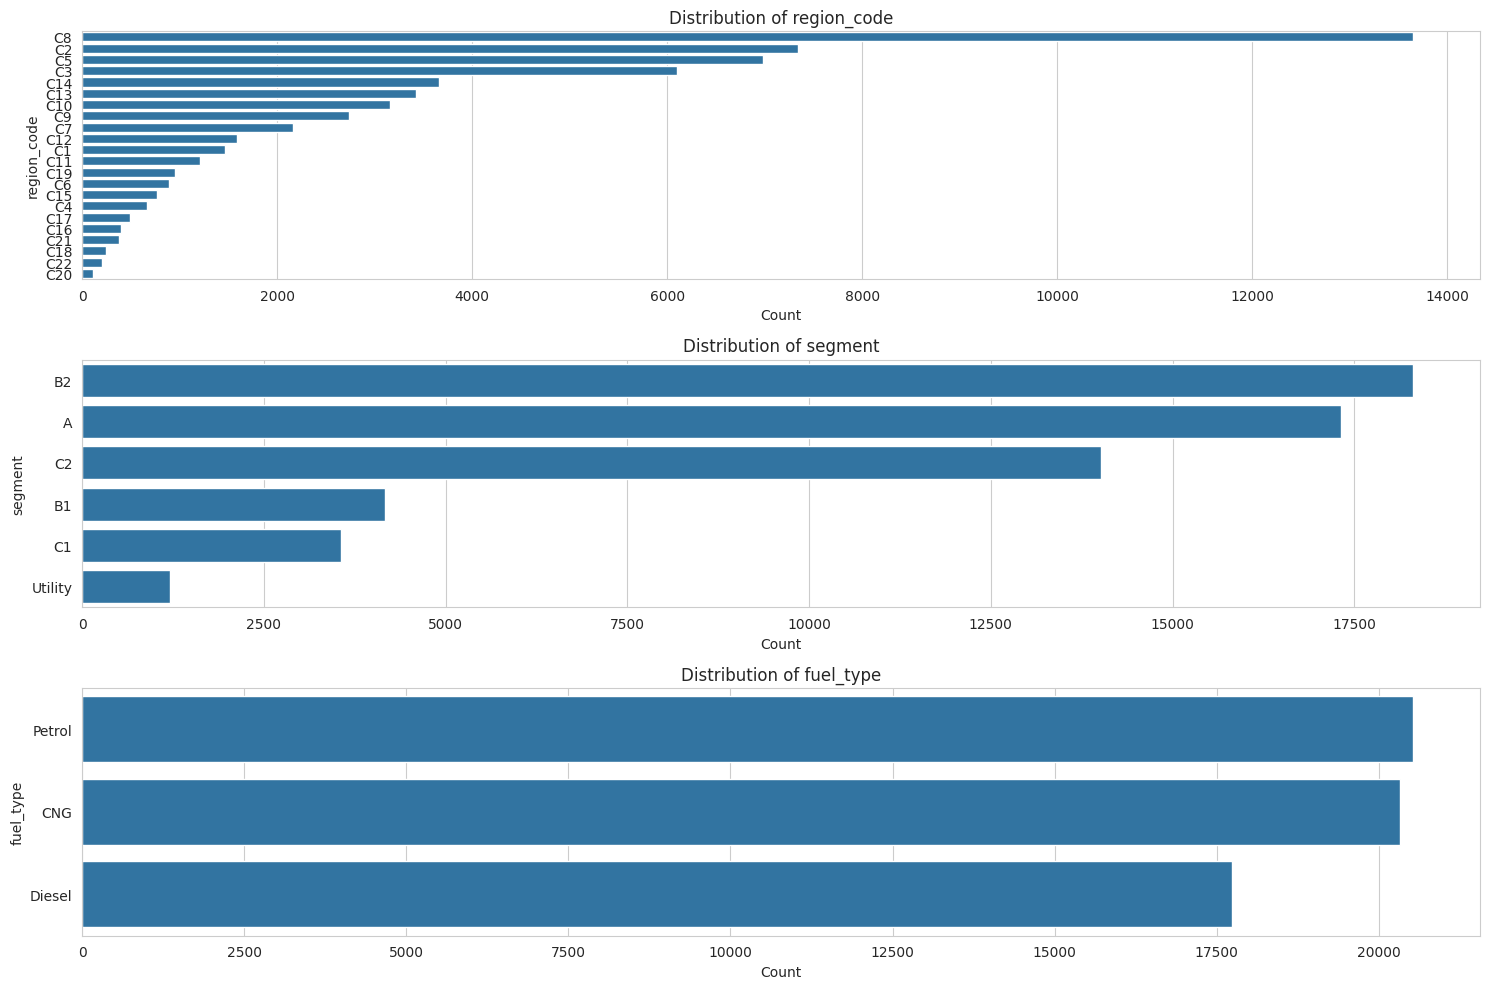

In [ ]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

<ipython-input-14-628a650b8b5a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index,
<ipython-input-14-628a650b8b5a>:16: UserWarning: 
The palette list has fewer values (3) than needed (22) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index,
<ipython-input-14-628a650b8b5a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index,
<ipython-input-14-628a650b8b5a>:16: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterp

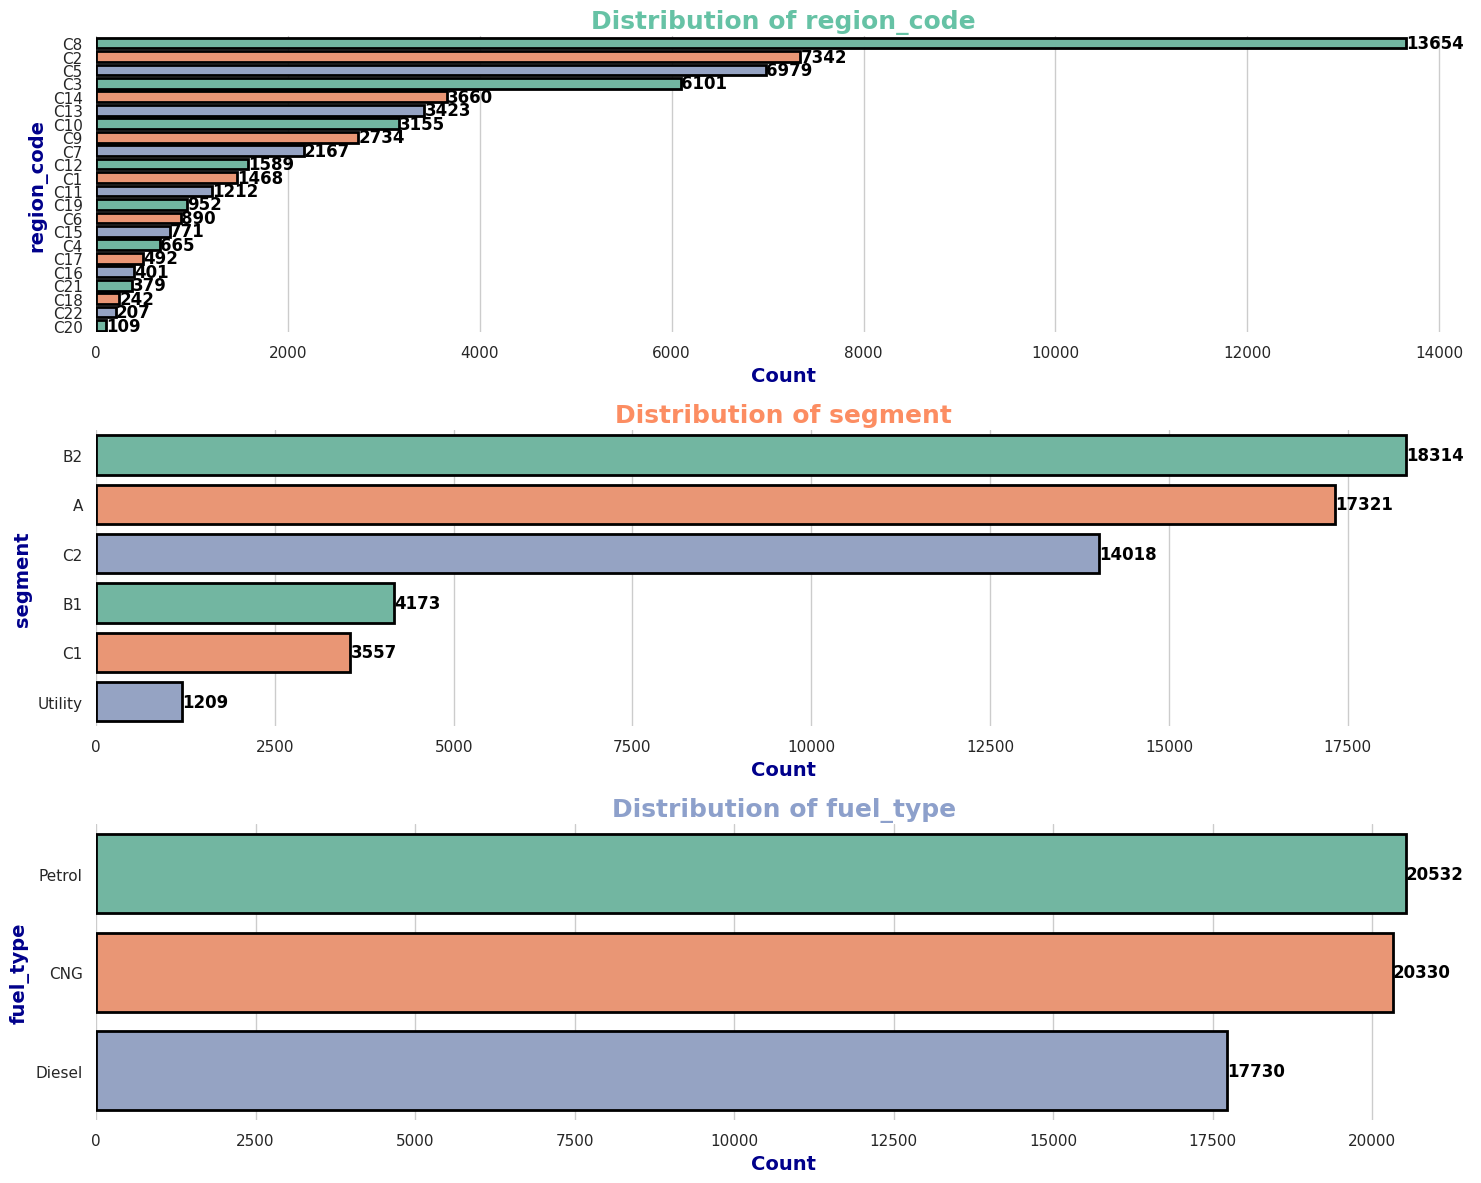

In [ ]:
# Selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# Setting up the plot size and style
plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

# Defining a vibrant color palette
colors = sns.color_palette("Set2", len(categorical_columns))

# Plotting distributions of categorical features with customization
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)

    # Customizing the countplot with vibrant colors
    ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index,
                       palette=colors, edgecolor='black', linewidth=2)

    # Adding annotations for counts on the bars
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height()/2, f'{int(width)}',
                va='center', ha='left', fontsize=12, fontweight='bold', color='black')

    # Adding titles and labels with bold font and bright colors
    plt.title(f'Distribution of {column}', fontsize=18, fontweight='bold', color=colors[i-1])
    plt.xlabel('Count', fontsize=14, fontweight='bold', color='darkblue')
    plt.ylabel(column, fontsize=14, fontweight='bold', color='darkblue')

    # Removing the top and right spines for a cleaner look
    sns.despine(left=True, bottom=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


##Handling Class Imbalance

In [ ]:
# separate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

,count
claim_status,
0,54844
1,54844


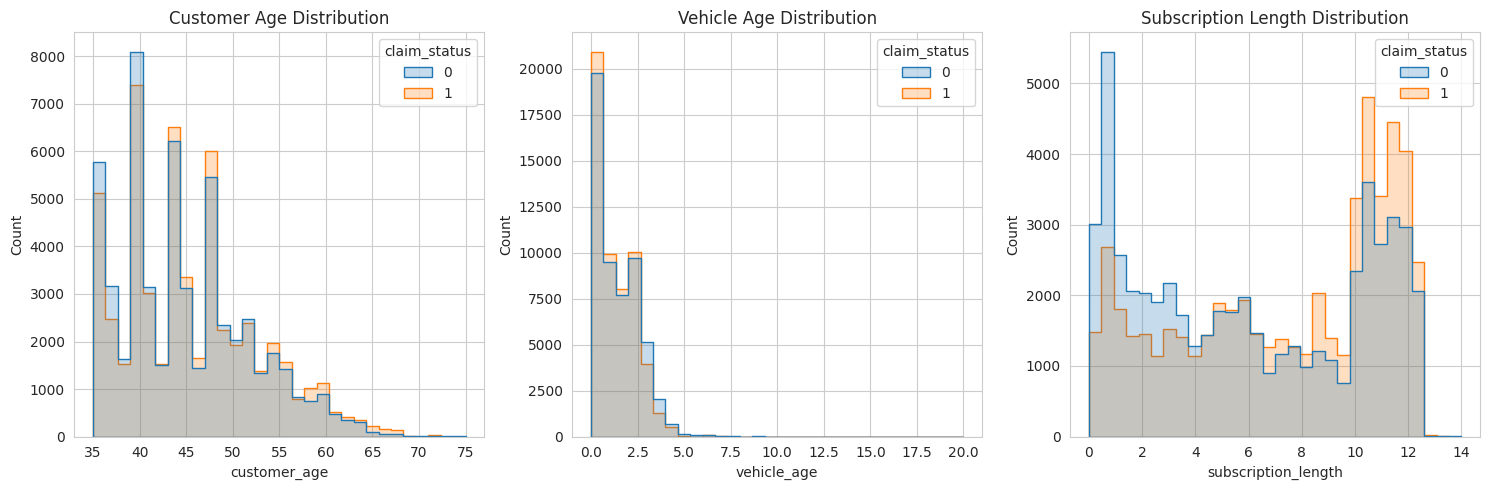

In [ ]:
# plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15, 5))

# 'customer_age' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Customer Age Distribution')

# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Vehicle Age Distribution')

# 'subscription_length' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()

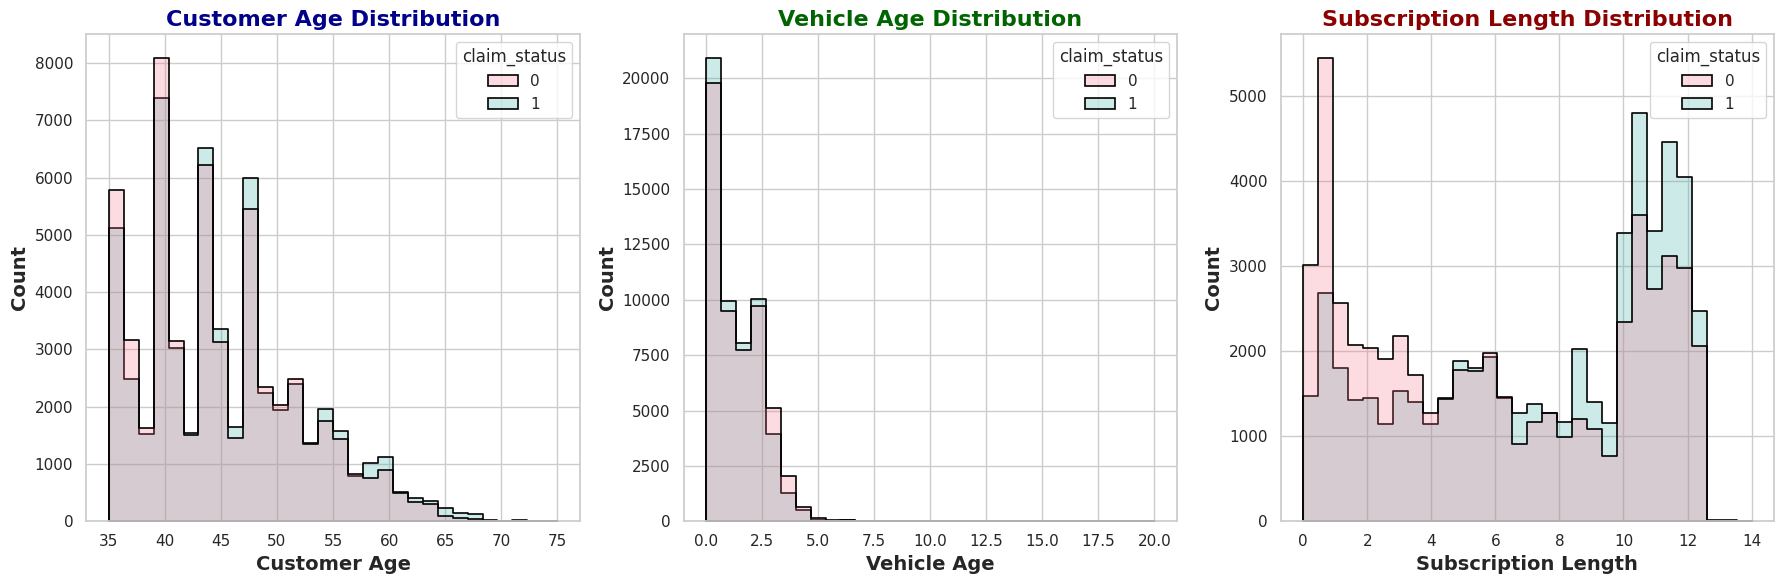

In [ ]:
# Setting up the plot size and style
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Defining a custom color palette
colors = sns.color_palette("husl", 2)  # Husl palette for vibrant hues

# Plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'

# 'Customer Age' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status',
             element='step', bins=30, palette=colors, edgecolor='black', linewidth=1.2)
plt.title('Customer Age Distribution', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Customer Age', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# 'Vehicle Age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status',
             element='step', bins=30, palette=colors, edgecolor='black', linewidth=1.2)
plt.title('Vehicle Age Distribution', fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel('Vehicle Age', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# 'Subscription Length' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status',
             element='step', bins=30, palette=colors, edgecolor='black', linewidth=1.2)
plt.title('Subscription Length Distribution', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Subscription Length', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Enhancing the layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


##Feature Selection

In [ ]:
# encode categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# separate features and target variable
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

# create a random forest classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# get feature importance
feature_importance = rf_model.feature_importances_

# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))  # displaying the top 10 important features

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


##Model Training

In [ ]:
oversampled_data = oversampled_data.drop('policy_id', axis=1)

# prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

import matplotlib.pyplot as plt

# Count of correctly and incorrectly classified instances
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# Customizing the pie chart
plt.figure(figsize=(10, 6))

# Define explode values to slightly separate slices
explode = (0.05, 0.05)

# Create the pie chart with more advanced customizations
wedges, texts, autotexts = plt.pie(
    classification_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#2E8B57', '#FF4500'],  # Deep colors for better contrast
    explode=explode,
    shadow=True,  # Adding shadow for depth
    pctdistance=0.85,  # Position percentage inside the pie slices
    textprops=dict(color="black", fontsize=14, fontweight='bold')  # Styling text
)

# Adding a central circle for a 'donut' effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adjust autotext size and color
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')

# Title with strong emphasis
plt.title('Model Classification Accuracy', fontsize=22, fontweight='bold', color='#333333')

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()

# Display the chart
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



In [ ]:
original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))


   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


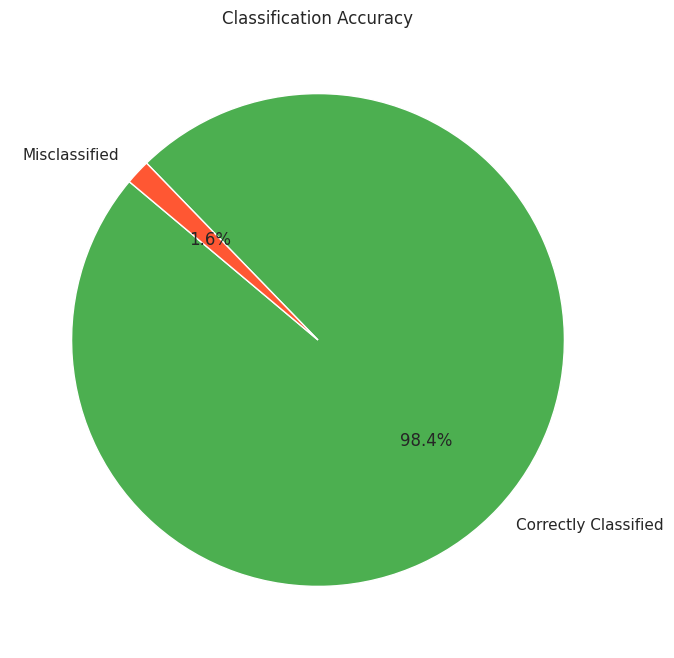

In [ ]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy')
plt.show()

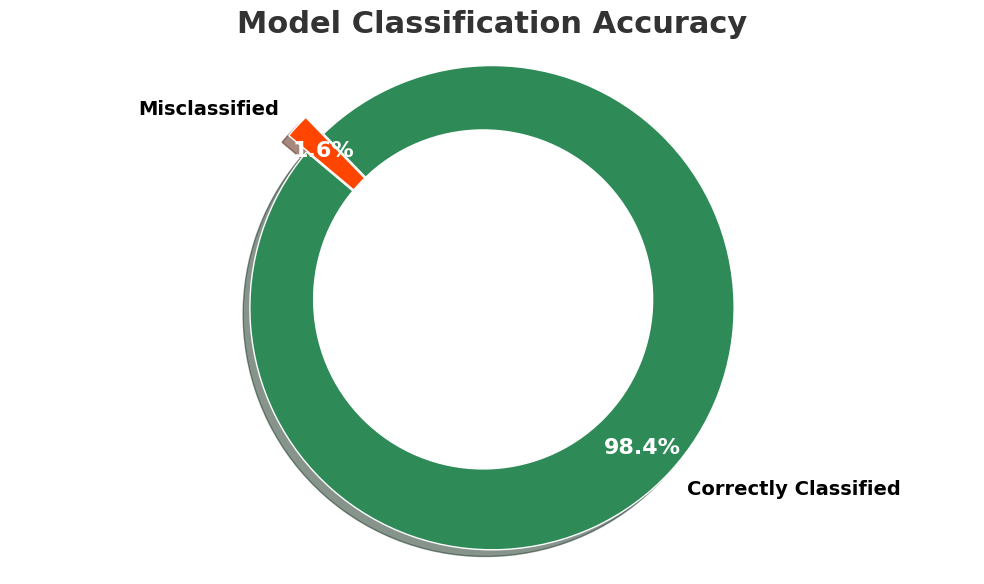

In [ ]:
import matplotlib.pyplot as plt

# Count of correctly and incorrectly classified instances
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# Customizing the pie chart
plt.figure(figsize=(10, 6))

# Define explode values to slightly separate slices
explode = (0.05, 0.05)

# Create the pie chart with more advanced customizations
wedges, texts, autotexts = plt.pie(
    classification_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#2E8B57', '#FF4500'],  # Deep colors for better contrast
    explode=explode,
    shadow=True,  # Adding shadow for depth
    pctdistance=0.85,  # Position percentage inside the pie slices
    textprops=dict(color="black", fontsize=14, fontweight='bold')  # Styling text
)

# Adding a central circle for a 'donut' effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adjust autotext size and color
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')

# Title with strong emphasis
plt.title('Model Classification Accuracy', fontsize=22, fontweight='bold', color='#333333')

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv("Insurance claims data.csv")

# Display the first few rows of the dataset
print(data.head())

# Check for null values
print(data.isnull().sum())

# Visualize the distribution of the target variable 'claim_status'
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=data)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

# Selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# Plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# Plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# Handling class imbalance using SMOTE
X = data.drop(['claim_status', 'policy_id'], axis=1)
y = data['claim_status']

# Encoding categorical variables
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Checking the new distribution of classes
print(y_resampled.value_counts())

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Feature Importance
feature_importance = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [ ]:
data = pd.read_csv("/content/imbalanced_data.csv")

In [ ]:
# Handling class imbalance using SMOTE
X = data.drop(['claim_status', 'policy_id'], axis=1)
y = data['claim_status']

# Encoding categorical variables
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Checking the new distribution of classes
print(y_resampled.value_counts())

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Feature Importance
feature_importance = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

claim_status
0    54844
1    54844
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     16567
           1       0.89      0.90      0.90     16340

    accuracy                           0.90     32907
   macro avg       0.90      0.90      0.90     32907
weighted avg       0.90      0.90      0.90     32907



NameError: name 'confusion_matrix' is not defined

#**===================**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, auc, f1_score, cohen_kappa_score, matthews_corrcoef
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import shap

In [ ]:
# Load the dataset
data = pd.read_csv("/content/imbalanced_data.csv")
print(data.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer

<ipython-input-3-10aeeea11052>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='claim_status', data=data, palette=palette, saturation=0.8)
<ipython-input-3-10aeeea11052>:5: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x='claim_status', data=data, palette=palette, saturation=0.8)


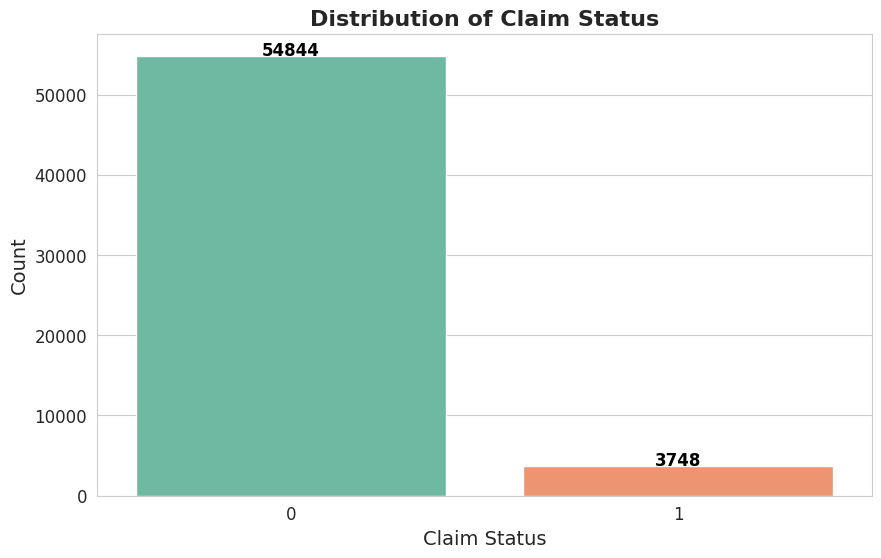

In [ ]:
# Visualization: Distribution of Target Variable
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 6))
sns.countplot(x='claim_status', data=data, palette=palette, saturation=0.8)
plt.title('Distribution of Claim Status', fontsize=16, fontweight='bold')
plt.xlabel('Claim Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', fontweight='bold')
plt.show()

# Selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']
palette = sns.color_palette("husl", len(numerical_columns))

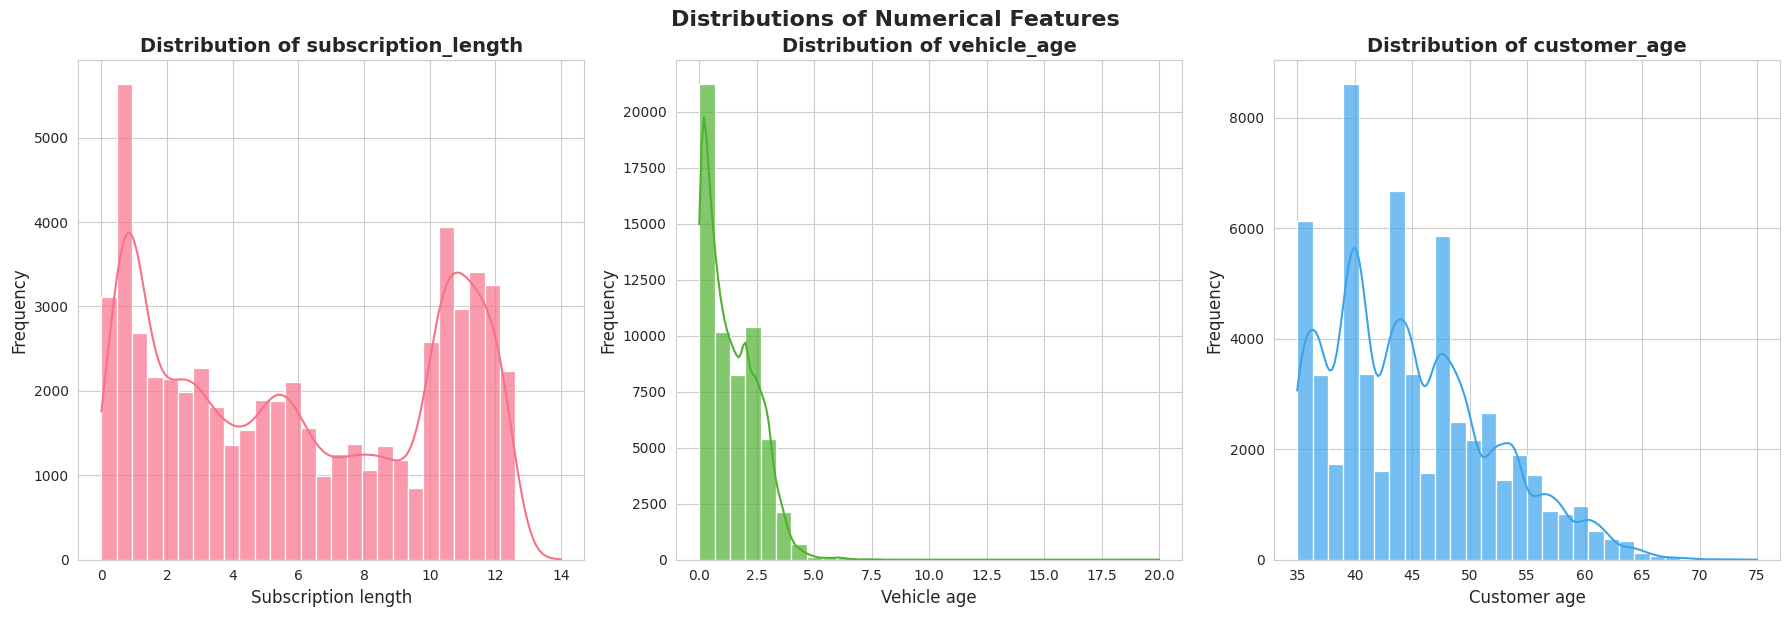

In [ ]:
# Plotting distributions of numerical features with customization
plt.figure(figsize=(18, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color=palette[i-1], alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

<ipython-input-5-42eec023a279>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index,
<ipython-input-5-42eec023a279>:10: UserWarning: 
The palette list has fewer values (3) than needed (22) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index,
<ipython-input-5-42eec023a279>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index,
<ipython-input-5-42eec023a279>:10: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpreta

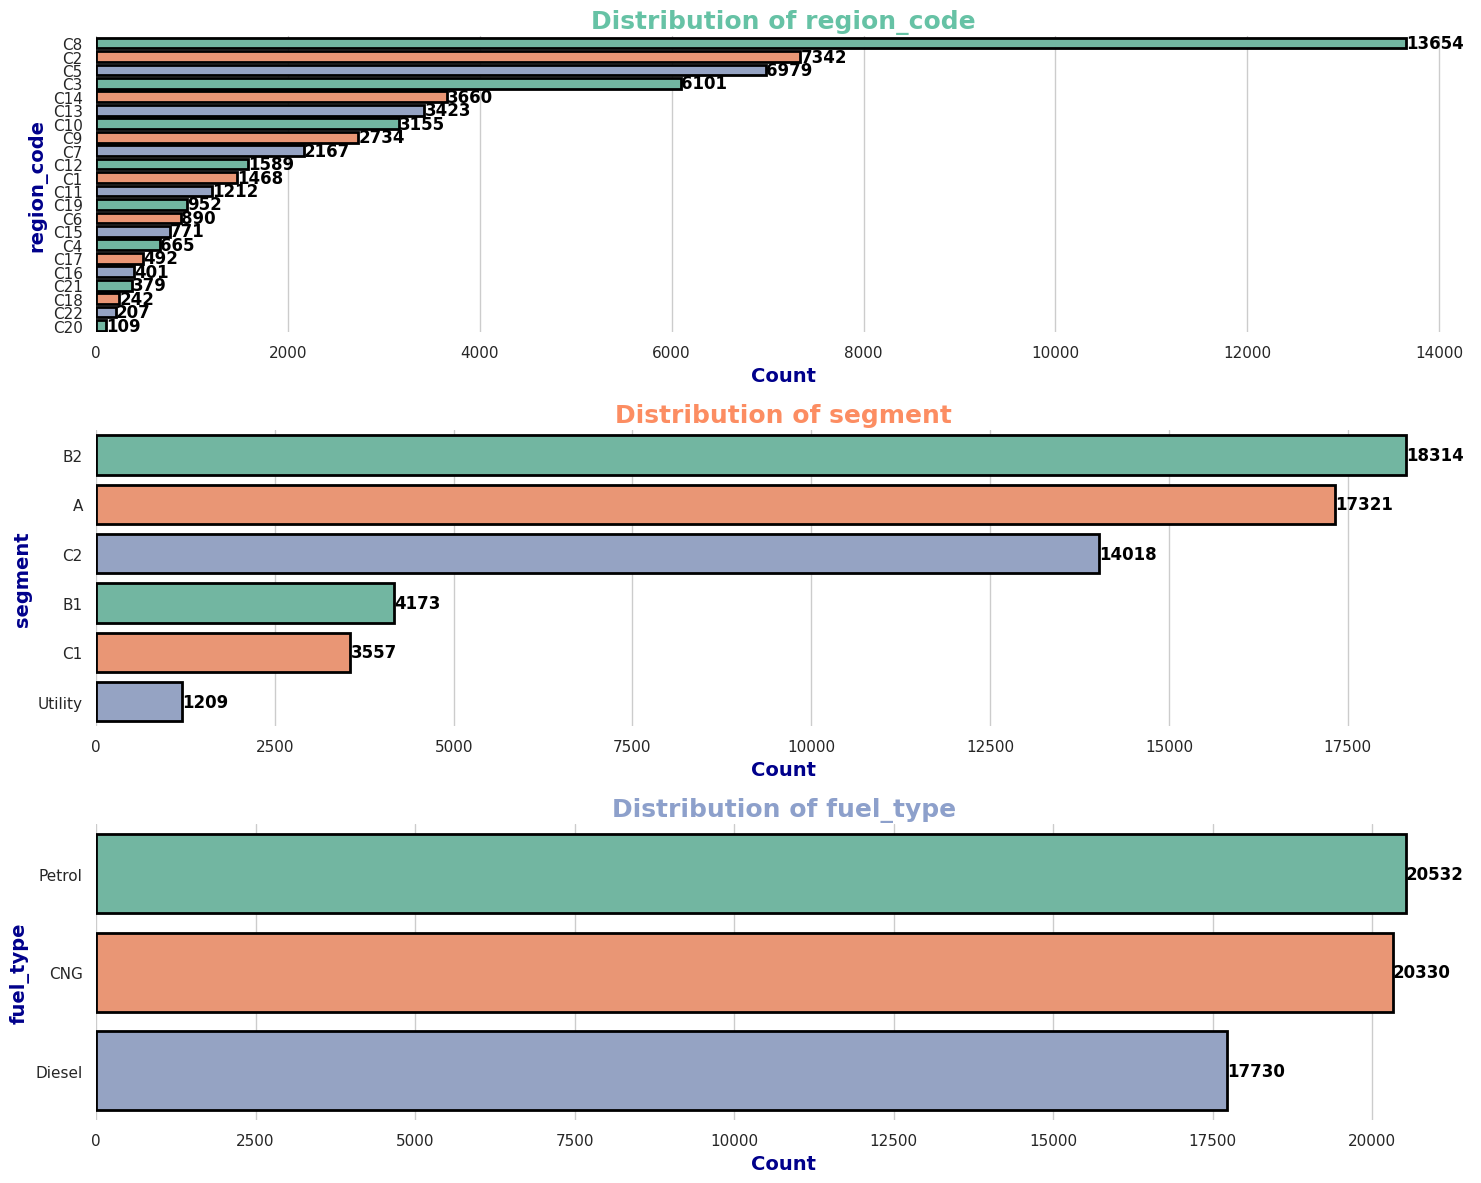

In [ ]:
# Selecting categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']
plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")
colors = sns.color_palette("Set2", len(categorical_columns))

# Plotting distributions of categorical features with customization
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index,
                       palette=colors, edgecolor='black', linewidth=2)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height()/2, f'{int(width)}',
                va='center', ha='left', fontsize=12, fontweight='bold', color='black')
    plt.title(f'Distribution of {column}', fontsize=18, fontweight='bold', color=colors[i-1])
    plt.xlabel('Count', fontsize=14, fontweight='bold', color='darkblue')
    plt.ylabel(column, fontsize=14, fontweight='bold', color='darkblue')
    sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

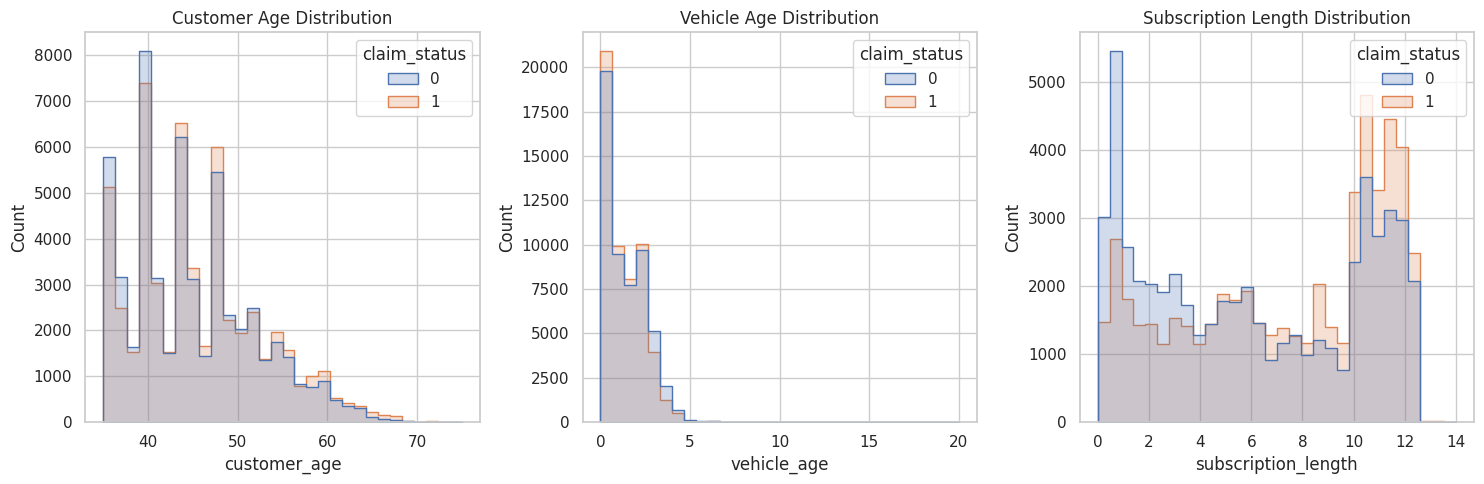

In [ ]:
# Separate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

# Oversample the minority class
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

# Plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Customer Age Distribution')
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Vehicle Age Distribution')
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# Encode categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# Separate features and target variable
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

# SMOTE with Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importance
feature_importance = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df.head(10))

                Feature  Importance
2           vehicle_age    0.157485
1   subscription_length    0.157319
0             policy_id    0.134563
3          customer_age    0.070711
5        region_density    0.046429
4           region_code    0.039635
23       turning_radius    0.037762
24               length    0.029391
25                width    0.028676
19         displacement    0.024930


In [ ]:
# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     15149
           1       0.96      0.91      0.94     15077

    accuracy                           0.94     30226
   macro avg       0.94      0.94      0.94     30226
weighted avg       0.94      0.94      0.94     30226



In [ ]:
oversampled_data = oversampled_data.drop('policy_id', axis=1)

# prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

import matplotlib.pyplot as plt

# Count of correctly and incorrectly classified instances
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# Customizing the pie chart
plt.figure(figsize=(10, 6))

# Define explode values to slightly separate slices
explode = (0.05, 0.05)

# Create the pie chart with more advanced customizations
wedges, texts, autotexts = plt.pie(
    classification_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#2E8B57', '#FF4500'],  # Deep colors for better contrast
    explode=explode,
    shadow=True,  # Adding shadow for depth
    pctdistance=0.85,  # Position percentage inside the pie slices
    textprops=dict(color="black", fontsize=14, fontweight='bold')  # Styling text
)

# Adding a central circle for a 'donut' effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adjust autotext size and color
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')

# Title with strong emphasis
plt.title('Model Classification Accuracy', fontsize=22, fontweight='bold', color='#333333')

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
# Advanced evaluation metrics
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")

Cohen's Kappa: 0.8796246198458901
Matthews Correlation Coefficient: 0.8807897691926617


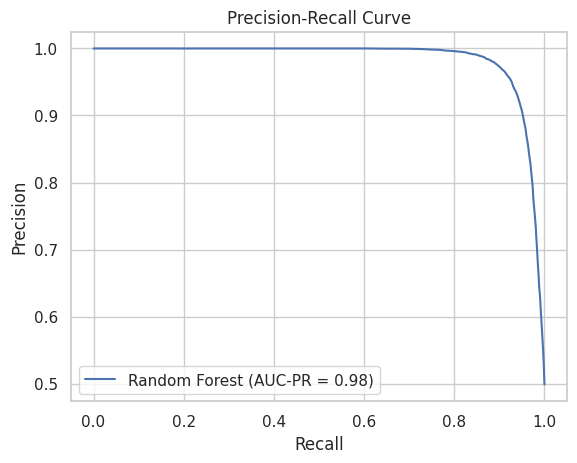

In [ ]:
# Precision-Recall Curve
y_scores = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auc_pr = auc(recall, precision)
plt.plot(recall, precision, label=f'Random Forest (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [ ]:
# Best parameters and evaluation
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15149
           1       0.94      0.89      0.91     15077

    accuracy                           0.92     30226
   macro avg       0.92      0.92      0.92     30226
weighted avg       0.92      0.92      0.92     30226

